In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
rank, nneurons, n_outputs, samples = 10, 100, 50, 500

W_proj = np.random.randn(n_outputs, nneurons)
W_fb = np.random.randn(n_outputs, n_outputs)
np.fill_diagonal(W_fb, 0)
proj_mat = np.random.randn(nneurons, rank)
pcs = np.random.randn(rank, samples)

In [3]:
xs = np.tanh(proj_mat @ pcs)
pca = PCA()
pca.fit(xs.T)
components = pca.components_
dist_mat = xs.T @ xs

In [4]:
ys = np.linalg.inv(np.eye(n_outputs) + W_fb) @ (W_proj @ xs)

In [5]:
baseline = np.linalg.norm(dist_mat - ys.T @ ys)
baseline

7467421.097076954

In [6]:
def update_weights(presynaptic, postsynaptic, lr, current_weights):
    dw = (postsynaptic[:, None] @ presynaptic[None, :] - np.diag(postsynaptic ** 2) @ current_weights) * lr
    return current_weights + dw

In [7]:
running_sum = 0
W_proj = np.random.randn(n_outputs, nneurons) / np.sqrt(nneurons)
W_fb = np.random.randn(n_outputs, n_outputs) / np.sqrt(n_outputs)
np.fill_diagonal(W_fb, 0)
lr = 1e-3
for trial in range(50):
    for sample in range(samples):
        y_act = np.linalg.inv(np.eye(n_outputs) + W_fb) @ (W_proj @ xs)[:, sample][:, None]
        # running_sum += y_act ** 2
        running_sum = 1000
        W_proj = update_weights(xs[:, sample], y_act.squeeze(), lr, W_proj)
        W_fb = update_weights(y_act.squeeze(), y_act.squeeze(), lr, W_fb)
        np.fill_diagonal(W_fb, 0)


In [8]:
ys = np.linalg.inv(np.eye(n_outputs) + W_fb) @ (W_proj @ xs)
pca_ys = PCA()
pca_ys.fit(ys.T)
post_distance = np.linalg.norm(dist_mat - ys.T @ ys)
post_distance

303.7269912162805

In [9]:
post_distance / baseline

4.067361238475909e-05

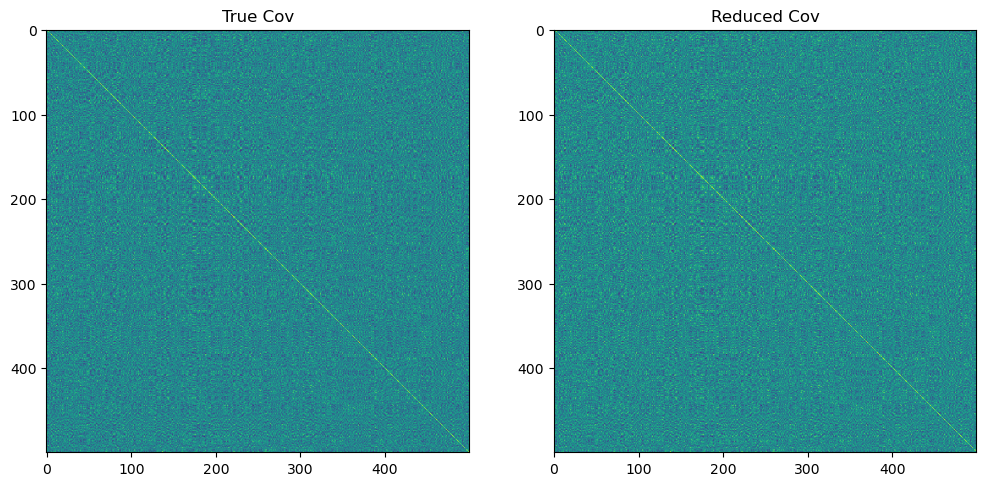

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].set_title('True Cov')
ax[0].imshow(dist_mat)
# plt.colorbar()
# plt.figure()
ax[1].set_title('Reduced Cov')
ax[1].imshow(ys.T @ ys)
# plt.colorbar()

Text(0.5, 0, 'PC')

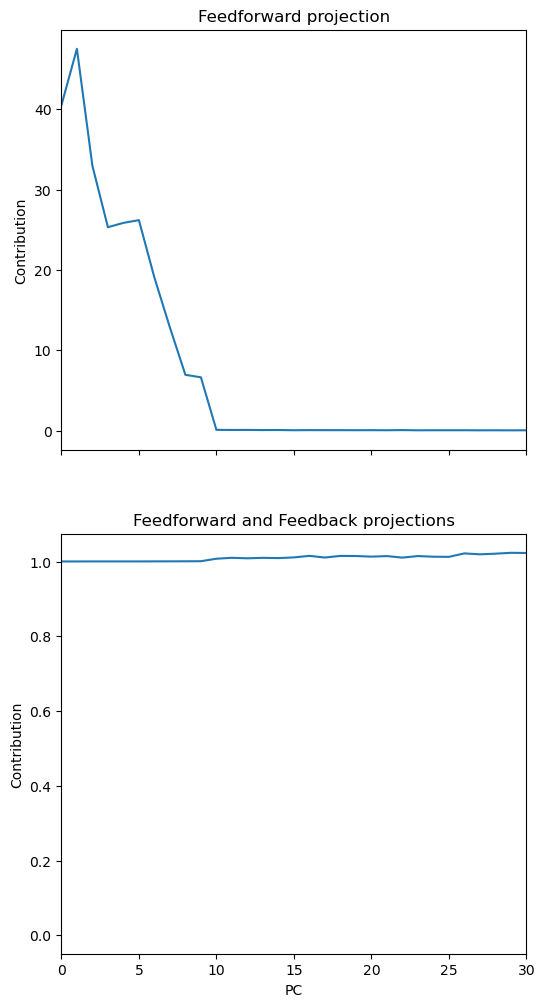

In [11]:
effective_weight_projections = np.linalg.inv(np.eye(n_outputs) + W_fb) @ W_proj @ components.T
weight_projections = W_proj @ components.T

_, ax = plt.subplots(2, 1, figsize=(6, 12), sharex=True)
ax[0].set_title('Feedforward projection')
ax[0].plot((weight_projections ** 2).sum(axis=0))
ax[1].set_title('Feedforward and Feedback projections')
ax[1].plot((effective_weight_projections ** 2).sum(axis=0))

for axis in ax:
    axis.set_ylabel('Contribution')
    axis.set_xlim([0, 30])

ax[-1].set_xlabel('PC')

Text(0, 0.5, 'Basal Ganglia PC 26')

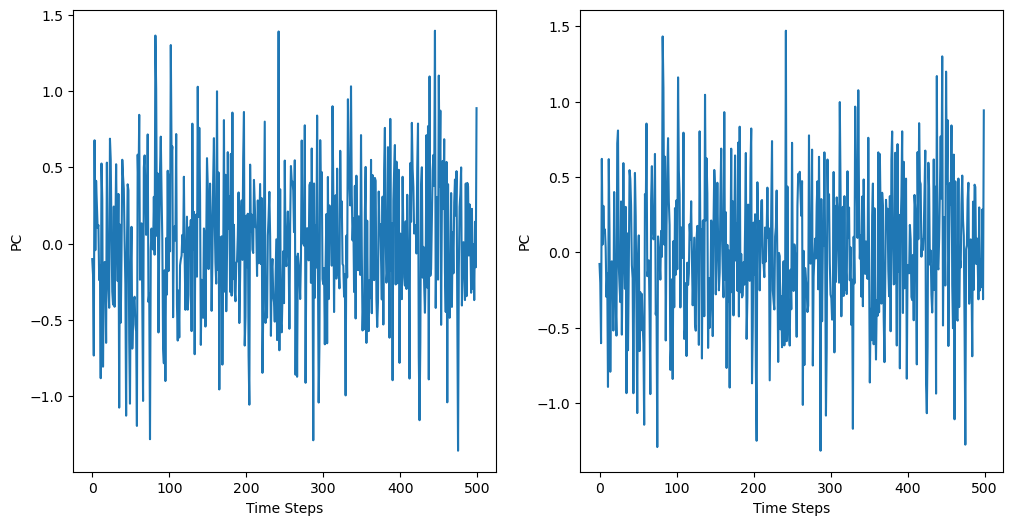

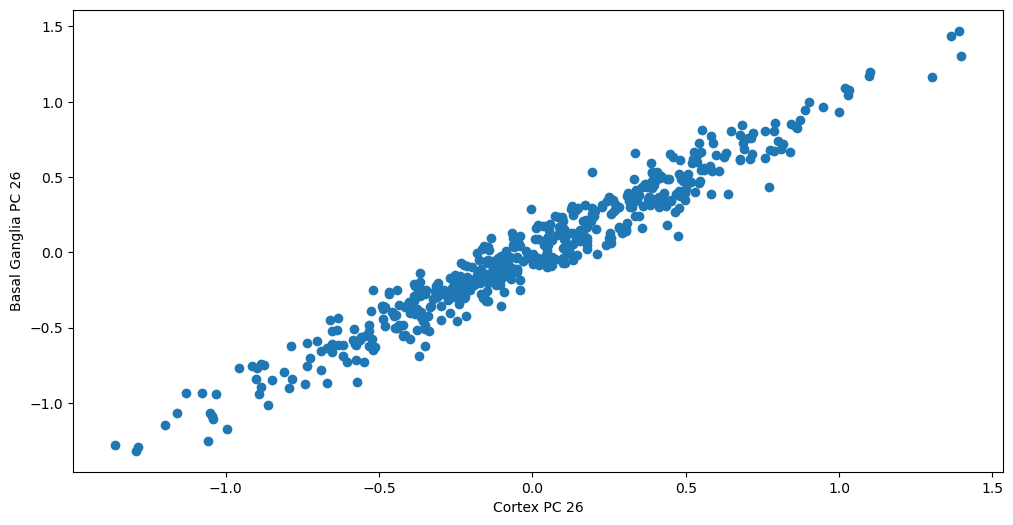

In [17]:
cortex_transformed = pca.transform(xs.T)
bg_transformed = pca_ys.transform(ys.T)
target_pc = 25
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].plot(cortex_transformed[:, target_pc])
ax[1].plot(bg_transformed[:, target_pc])
for axis in ax:
    axis.set_xlabel('Time Steps')
    axis.set_ylabel('PC')

plt.figure(figsize=(12, 6))
plt.scatter(cortex_transformed[:, target_pc], bg_transformed[:, target_pc])
plt.xlabel(f"Cortex PC {target_pc + 1}")
plt.ylabel(f"Basal Ganglia PC {target_pc + 1}")


In [13]:
cortex_transformed.shape

(500, 100)